In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('quote2.png')
img2 = cv2.imread('praia.jpg')

## Limiarização

In [3]:
# limiar
l = 100

# Todas as coordenadas serão avaliadas conforme a condicional
indL = np.where(img1 > l)

# Cria uma imagem com o mesmo tamanho da original
img1_thresh = np.zeros(img1.shape)

# muda para o valor 1 todos os pixels que possuem valor acima do threshold
img1_thresh[indL] = 1 

(-0.5, 639.5, 399.5, -0.5)

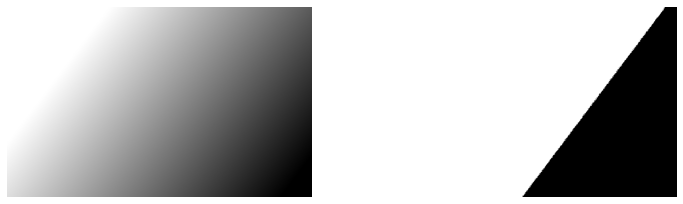

In [4]:
plt.figure(figsize = (12, 12)) 
 
plt.subplot(121)
plt.imshow(img1, cmap = "gray")
plt.axis('off')

plt.subplot(122)
plt.imshow(img1_thresh, cmap = "gray")
plt.axis('off')

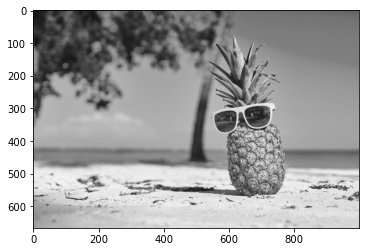

In [5]:
img_pb = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
plt.imshow(cv2.cvtColor(img_pb, cv2.COLOR_BGR2RGB))

(-0.5, 999.5, 666.5, -0.5)

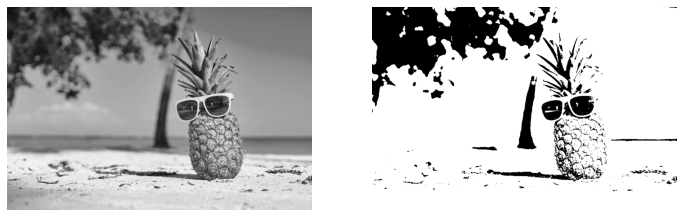

In [6]:
l = 100

indL = np.where(img_pb > l)

img2_thresh = np.zeros(img_pb.shape)

img2_thresh[indL] = 1 

plt.figure(figsize = (12, 12)) 

plt.subplot(121)
plt.imshow(img_pb, cmap = "gray")
plt.axis('off')

plt.subplot(122)
plt.imshow(img2_thresh, cmap = "gray")
plt.axis('off')



### Com a biblioteca OpenCV tem vários tipos de threshold

(-0.5, 999.5, 666.5, -0.5)

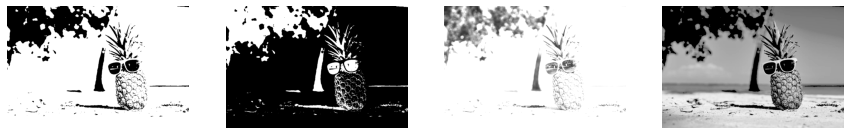

In [7]:
ret, thresh1 = cv2.threshold(img_pb, 100, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_pb, 100, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_pb, 100, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_pb, 100, 255, cv2.THRESH_TOZERO)

plt.figure(figsize = (15, 15))

plt.subplot(141)
plt.imshow(thresh1, cmap = "gray")
plt.axis('off')

plt.subplot(142)
plt.imshow(thresh2, cmap = "gray")
plt.axis('off')

plt.subplot(143)
plt.imshow(thresh3, cmap = "gray")
plt.axis('off')

plt.subplot(144)
plt.imshow(thresh4, cmap = "gray")
plt.axis('off')

# Segmentação por limiarização (Otsu)

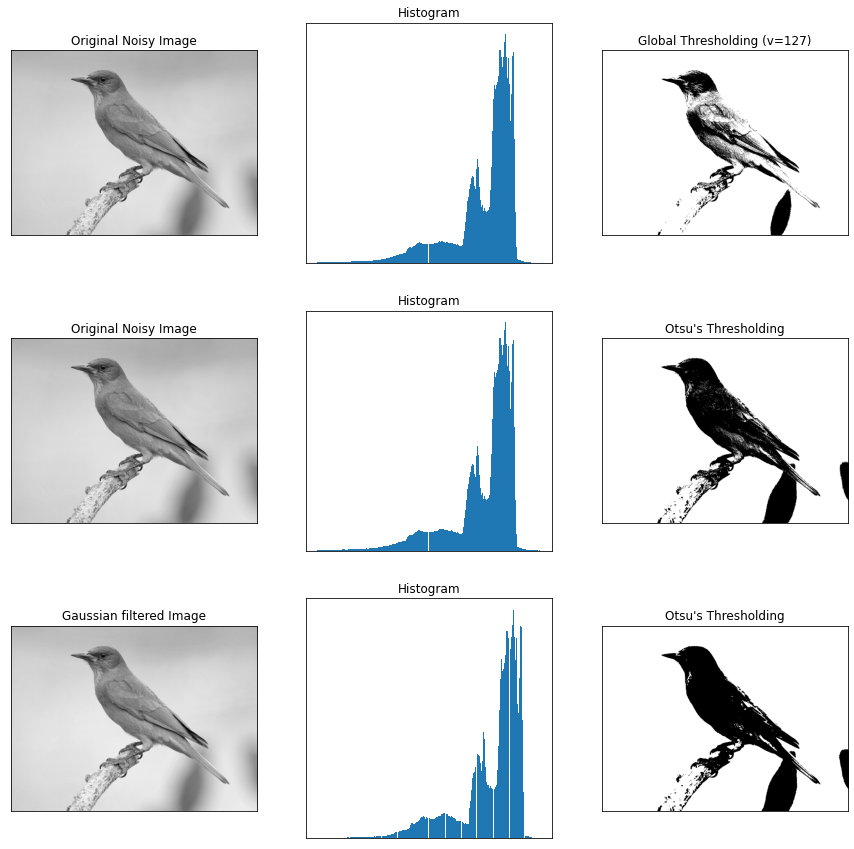

In [8]:
img = cv2.imread('bird.png',0)

# Limiarização global
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Limiarização de de Otsu
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Limiarização de de Otsu após a filtragem gaussiana
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize = (15, 15))

for i in range(3):
    plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3, 3, i * 3 + 2), plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3, 3, i * 3 + 3), plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2]), plt.xticks([]), plt.yticks([])
    
plt.show()

# Segmentação de imagens coloridas

(-0.5, 1399.5, 1049.5, -0.5)

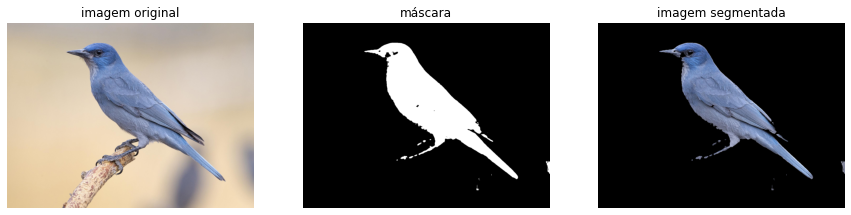

In [9]:
img = cv2.imread('bird.png')
blur = cv2.blur(img, (5, 5))
blur0 = cv2.medianBlur(blur, 5)
blur1 = cv2.GaussianBlur(blur0, (5, 5), 0)
blur2 = cv2.bilateralFilter(blur1, 9, 75, 75)
hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)

# estabelecer o limite ou os valores do intervalo para todos os
# pixeis que queremos extrair.
low_blue = np.array([55, 0, 0])
high_blue = np.array([118, 255, 255])

#A “máscara” é basicamente nós colocando uma máscara 
#sobre todos os outros pixels que não estão em nosso
#intervalo de pixels descrito.
mask = cv2.inRange(hsv, low_blue, high_blue)
res = cv2.bitwise_and(img, img, mask = mask)

plt.figure(figsize = (15, 15))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap = "gray", vmin = 0, vmax = 255)
plt.title("imagem original")
plt.axis('off')

plt.subplot(132)
plt.imshow(mask, cmap = "gray", vmin = 0, vmax = 255)
plt.title("máscara")
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), cmap = "gray", vmin = 0, vmax = 255)
plt.title("imagem segmentada")
plt.axis('off')


(-0.5, 719.5, 575.5, -0.5)

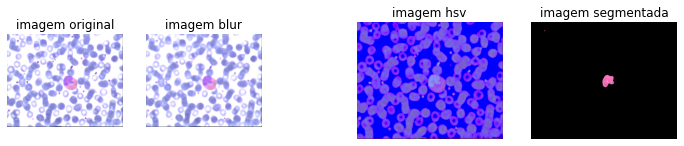

In [10]:
image = cv2.imread('5.bmp')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
blur = cv2.medianBlur(hsv, 11)

lower = np.array([132, 113, 223])
upper = np.array([140, 153, 255])

mask = cv2.inRange(blur, lower, upper)
res = cv2.bitwise_and(image, image, mask = mask)            

plt.figure(figsize = (12, 12))

plt.subplot(151)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap = "gray", vmin = 0, vmax = 255)
plt.title("imagem original")
plt.axis('off')

plt.subplot(152)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_HSV2RGB), cmap = "gray", vmin = 0, vmax = 255)
plt.title("imagem blur")
plt.axis('off')

plt.subplot(153)
plt.imshow(mask)
plt.title("máscara")
plt.axis('off')

plt.subplot(143)
plt.imshow(hsv, cmap = "gray", vmin = 0, vmax = 255)
plt.title("imagem hsv")
plt.axis('off')

plt.subplot(144)
plt.imshow(res, cmap = "gray", vmin = 0, vmax = 255)
plt.title("imagem segmentada")
plt.axis('off')


(-0.5, 399.5, 297.5, -0.5)

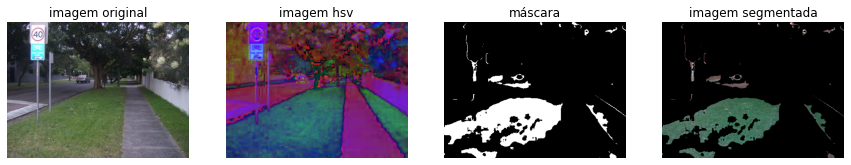

In [11]:
image = cv2.imread('calcadagrama.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
blur = cv2.medianBlur(hsv, 11)

lower = np.array([40, 40, 95])
upper = np.array([190, 125, 120])

mask = cv2.inRange(blur, lower, upper)
res = cv2.bitwise_and(image, image, mask = mask)

plt.figure(figsize = (15, 15))

plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap = "gray", vmin = 0, vmax = 255)
plt.title("imagem original")
plt.axis('off')

plt.subplot(142)
plt.imshow(hsv, cmap = "gray", vmin = 0, vmax = 255)
plt.title("imagem hsv")
plt.axis('off')

plt.subplot(143)
plt.imshow(mask, cmap = "gray", vmin = 0, vmax = 255)
plt.title("máscara")
plt.axis('off')

plt.subplot(144)
plt.imshow(res, cmap = "gray", vmin = 0, vmax = 255)
plt.title("imagem segmentada")
plt.axis('off')